## Airline Passenger Satisfaction

- Customer satisfaction scores from 120,000+ airline passengers, including additional information about each passenger, their flight, and type of travel, as well as their evaluation of different factors like cleanliness, comfort, service, and overall experience.


### Recommended Analysis 
- Which percentage of airline passengers are satisfied? 
     - Does it vary by customer type? 
     - What about the type of travel?
- What is the customer profile for a repeating airline passenger?
- Does flight distance affect customer preferences or flight patterns?
- Which factors contribute to customer satisfaction the most? What about dissatisfaction?


### Importing Libraries 


In [120]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [121]:
airpass_df = pd.read_csv('airline_passenger_satisfaction.csv')
airpass_df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [122]:
airpass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [123]:
airpass_df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [124]:
# make all columns lower cases for easier referencing
airpass_df.columns = airpass_df.columns.str.lower()

In [125]:
airpass_df.shape

(129880, 24)

### Checking for missing values

In [126]:
airpass_df.isnull().sum()

id                                          0
gender                                      0
age                                         0
customer type                               0
type of travel                              0
class                                       0
flight distance                             0
departure delay                             0
arrival delay                             393
departure and arrival time convenience      0
ease of online booking                      0
check-in service                            0
online boarding                             0
gate location                               0
on-board service                            0
seat comfort                                0
leg room service                            0
cleanliness                                 0
food and drink                              0
in-flight service                           0
in-flight wifi service                      0
in-flight entertainment           

### Reviewing columns with nulls

In [127]:
airpass_df[airpass_df['arrival delay'].isnull()]

,id,gender,age,customer type,type of travel,class,flight distance,departure delay,arrival delay,departure and arrival time convenience,...,on-board service,seat comfort,leg room service,cleanliness,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling,satisfaction
246,247,Male,11,Returning,Business,Business,719,38,NaN,1,...,4,4,3,4,4,3,4,4,4,Neutral or Dissatisfied
883,884,Male,39,Returning,Business,Business,396,0,NaN,3,...,3,4,3,3,3,3,3,3,3,Satisfied
1965,1966,Male,36,Returning,Business,Economy,383,2,NaN,4,...,5,2,2,2,2,2,2,2,3,Satisfied
2407,2408,Female,55,Returning,Business,Business,2904,58,NaN,5,...,4,3,4,4,5,4,4,4,4,Neutral or Dissatisfied
2448,2449,Male,21,Returning,Personal,Economy Plus,767,5,NaN,3,...,4,1,2,1,1,2,1,1,1,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129000,129001,Male,46,First-time,Business,Business,2704,7,NaN,3,...,4,4,2,4,4,4,3,4,3,Neutral or Dissatisfied
129003,129004,Female,17,First-time,Business,Economy,2704,0,NaN,3,...,2,1,4,1,1,3,3,1,4,Neutral or Dissatisfied
129014,129015,Male,57,Returning,Business,Business,2704,0,NaN,4,...,4,4,4,5,2,4,4,4,4,Satisfied
129015,129016,Female,22,Returning,Business,Business,2611,8,NaN,3,...,4,4,3,4,4,4,3,4,3,Satisfied


In [128]:
tot_missing = airpass_df.isnull().sum()
tot_size = np.product(airpass_df.shape)
tot_size

3117120

In [129]:
missing_per = (tot_missing/tot_size)*100
missing_per

id                                        0.000000
gender                                    0.000000
age                                       0.000000
customer type                             0.000000
type of travel                            0.000000
class                                     0.000000
flight distance                           0.000000
departure delay                           0.000000
arrival delay                             0.012608
departure and arrival time convenience    0.000000
ease of online booking                    0.000000
check-in service                          0.000000
online boarding                           0.000000
gate location                             0.000000
on-board service                          0.000000
seat comfort                              0.000000
leg room service                          0.000000
cleanliness                               0.000000
food and drink                            0.000000
in-flight service              

In [130]:
### Dropping missing values 
airpass_df.dropna(inplace=True)

In [131]:
airpass_df.shape

(129487, 24)

## Background Data

In [132]:
airpass_df['age'].describe()

count    129487.000000
mean         39.428761
std          15.117597
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: age, dtype: float64

In [133]:
airpass_df['age'].median()

40.0

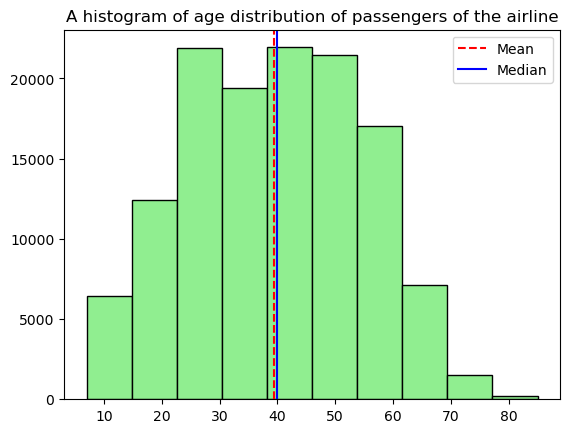

In [134]:
plt.hist(airpass_df.age, bins=10, color = 'lightgreen', edgecolor = 'black')
plt.title('A histogram of age distribution of passengers of the airline')
plt.axvline(airpass_df['age'].mean(), color = 'red', linestyle='dashed', label='Mean')
plt.axvline(airpass_df['age'].median(), color = 'blue', label='Median')
plt.legend();

### The minimum age for passengers is 7years and the oldest passenger is 85. 
### The average age of passengers is 40years with majority of them older than 40 

In [135]:
gen_dist = airpass_df['gender'].value_counts('normalize')*100
gen_dist

Female    50.741001
Male      49.258999
Name: gender, dtype: float64

### There is a slightly larger female passenger population than male

# Which percentage of airline passengers are satisfied?

In [136]:
airpass_df[airpass_df['satisfaction'] == 'Satisfied']

,id,gender,age,customer type,type of travel,class,flight distance,departure delay,arrival delay,departure and arrival time convenience,...,on-board service,seat comfort,leg room service,cleanliness,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling,satisfaction
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129863,129864,Female,39,Returning,Business,Business,2747,0,0.0,1,...,5,4,5,3,3,5,1,5,5,Satisfied
129864,129865,Male,38,Returning,Business,Business,2740,0,0.0,3,...,5,4,5,5,2,5,3,5,5,Satisfied
129866,129867,Female,20,First-time,Business,Economy,447,0,4.0,0,...,3,5,3,4,4,5,4,4,4,Satisfied
129871,129872,Female,32,Returning,Business,Economy Plus,337,0,1.0,2,...,5,4,1,4,4,1,4,4,3,Satisfied


In [137]:
satisfied = airpass_df['satisfaction'] == 'Satisfied'
satisfied.sum()

56262

In [138]:
sat_per = round((satisfied.sum()/airpass_df.satisfaction.count())*100,2)
print(f'{sat_per}% of customers are satisfied')

43.45% of customers are satisfied


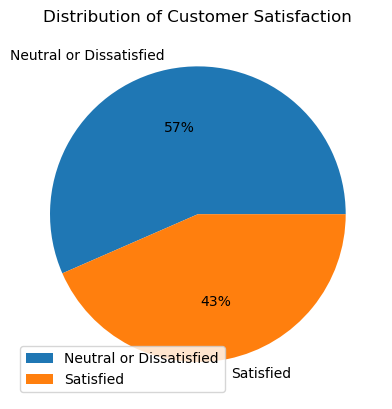

In [139]:
plt.pie(airpass_df.satisfaction.value_counts(), labels=airpass_df.satisfaction.unique(), autopct='%.0f%%')
plt.title('Distribution of Customer Satisfaction')
plt.legend();

In [140]:
gender_st = airpass_df.groupby('gender')['satisfaction'].value_counts('normalize').unstack()*100
gender_st

satisfaction,Neutral or Dissatisfied,Satisfied
gender,,
Female,57.111547,42.888453
Male,55.971717,44.028283


### The male passengers appear more satisfied with the airline than the female customers

In [141]:
sat_custype = airpass_df.groupby('customer type')['satisfaction'].value_counts('normalize').unstack()*100
sat_custype

satisfaction,Neutral or Dissatisfied,Satisfied
customer type,,
First-time,76.014169,23.985831
Returning,52.186286,47.813714


### Satisfaction of customers differs for the customer type. The majority (76%) of first-time customers are dissatisfied or neutral and only 24% are satisfied. 

### More than half (52%) of the returning customers are also disssatisfied or neutral. 

In [142]:
class_st = airpass_df.groupby('class')['satisfaction'].value_counts('normalize').unstack()*100
class_st

satisfaction,Neutral or Dissatisfied,Satisfied
class,,
Business,30.553315,69.446685
Economy,81.241289,18.758711
Economy Plus,75.373134,24.626866


### Business class travelers are more satisfied with the airline than the economy and economy plus passengers. Economy plus passengers however are also more satisfied with the airline than economy passengers. 

In [143]:
trav_st = airpass_df.groupby('type of travel')['satisfaction'].value_counts('normalize').unstack()*100
trav_st

satisfaction,Neutral or Dissatisfied,Satisfied
type of travel,,
Business,41.632288,58.367712
Personal,89.873133,10.126867


### Also, a larger proportion of passengers who travelled for business were satisfied as compared to those who travelled for personal reasons. 
- Passenger who traveled for personal reasons were largely dissatisfied or neutral in their satisfaction with the airline

In [144]:
pers_st = airpass_df.groupby('type of travel')['class'].value_counts('normalize').unstack()*100
pers_st

class,Business,Economy,Economy Plus
type of travel,,,
Business,66.325675,28.208396,5.465929
Personal,6.655512,82.128765,11.215723


### As evident from above, above 80% of passengers who traveled for personal reasons traveled with economy class. 
- Economy class passengers as identified earlier are the least satisfied with the airline. 

In [145]:
sat_custype_new = airpass_df.groupby('customer type')['class'].value_counts('normalize').unstack()*100
sat_custype_new

class,Business,Economy,Economy Plus
customer type,,,
First-time,38.837817,57.316353,3.845829
Returning,49.899313,42.094864,8.005824


In [146]:
class_new = airpass_df.groupby(['customer type','class'])['satisfaction'].value_counts('normalize').unstack()*100
class_new

satisfaction                Neutral or Dissatisfied  Satisfied
customer type class                                           
First-time    Business                    60.314875  39.685125
              Economy                     85.579753  14.420247
              Economy Plus                91.995614   8.004386
Returning     Business                    25.359985  74.640015
              Economy                     79.916901  20.083099
              Economy Plus                73.582900  26.417100

### First-time customers also mainly traveled with economy class and this to an extent explains their dissatisfaction with the airline. 
- A few however did travel with business class and remain the most satisfied group, yet the majority of them (60%) were still dissatisfied or neutral with the experience and an even larger proportion were dissatisfied or neutral for their economy plus experience.
- For returning passengers, the most satisfied group also remain the those who booked business class. 
- The experience at the economy and economy plus classes need to be relooked assessed

In [147]:
airpass_df.columns

Index(['id', 'gender', 'age', 'customer type', 'type of travel', 'class',
       'flight distance', 'departure delay', 'arrival delay',
       'departure and arrival time convenience', 'ease of online booking',
       'check-in service', 'online boarding', 'gate location',
       'on-board service', 'seat comfort', 'leg room service', 'cleanliness',
       'food and drink', 'in-flight service', 'in-flight wifi service',
       'in-flight entertainment', 'baggage handling', 'satisfaction'],
      dtype='object')

In [148]:
clean = pd.DataFrame(airpass_df['cleanliness'].value_counts()).reset_index()
dep_conv = pd.DataFrame(airpass_df['departure and arrival time convenience'].value_counts()).reset_index()
booking = pd.DataFrame(airpass_df['ease of online booking'].value_counts()).reset_index()
check_in = pd.DataFrame(airpass_df['check-in service'].value_counts()).reset_index()
onl_boarding = pd.DataFrame(airpass_df['online boarding'].value_counts()).reset_index()
gate_location = pd.DataFrame(airpass_df['gate location'].value_counts()).reset_index()
seat_com = pd.DataFrame(airpass_df['seat comfort'].value_counts()).reset_index()
on_board_srv = pd.DataFrame(airpass_df['on-board service'].value_counts()).reset_index()
leg_room = pd.DataFrame(airpass_df['leg room service'].value_counts()).reset_index()
food_drink = pd.DataFrame(airpass_df['food and drink'].value_counts()).reset_index()
in_flight = pd.DataFrame(airpass_df['in-flight service'].value_counts()).reset_index()
inflight_wifi = pd.DataFrame(airpass_df['in-flight wifi service'].value_counts()).reset_index()
inflight_ent = pd.DataFrame(airpass_df['in-flight entertainment'].value_counts()).reset_index()
baggage_hand = pd.DataFrame(airpass_df['baggage handling'].value_counts()).reset_index()

In [149]:
# Including 0 index for baggage_handle
zero_ind = {'index':0,'baggage handling':0}

In [150]:
baggage_hand = baggage_hand.append(zero_ind, ignore_index=True)

C:\Users\Samuel Oduro Ofori\AppData\Local\Temp\ipykernel_6004\3138781586.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baggage_hand = baggage_hand.append(zero_ind, ignore_index=True)


In [151]:
sat_stack = clean.merge(dep_conv, on='index').merge(booking,on='index').merge(check_in, on='index').merge(onl_boarding,on='index').merge(gate_location, on='index').merge(seat_com, on='index').merge(on_board_srv, on='index').merge(leg_room, on='index').merge(food_drink, on='index').merge(in_flight, on='index').merge(inflight_wifi, on='index').merge(inflight_ent, on='index').merge(baggage_hand, on='index')

In [152]:
# Transpose sat_stack
sat_stack.drop('index', axis=1, inplace=True)

In [153]:
sat_stack

,cleanliness,departure and arrival time convenience,ease of online booking,check-in service,online boarding,gate location,seat comfort,on-board service,leg room service,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling
0,33871,31786,24362,36229,38353,30376,39651,38587,35779,30477,47198,24702,36682,46631
1,30552,22302,30297,35343,27040,35611,23258,28460,24982,27712,25232,32087,23805,25771
2,28321,27906,17371,25800,25941,17354,33056,29407,30815,27865,33962,14304,31451,33761
3,20049,21478,29983,16056,21866,24219,18462,18290,24469,27293,14252,32236,21897,14316
4,16680,19351,21808,16058,13216,21926,15059,14738,12846,16010,8838,22250,15634,9008
5,14,6664,5666,1,3071,1,1,5,596,130,5,3908,18,0


In [154]:
trans = pd.DataFrame(sat_stack.transpose())
trans

,0,1,2,3,4,5
cleanliness,33871,30552,28321,20049,16680,14
departure and arrival time convenience,31786,22302,27906,21478,19351,6664
ease of online booking,24362,30297,17371,29983,21808,5666
check-in service,36229,35343,25800,16056,16058,1
online boarding,38353,27040,25941,21866,13216,3071
gate location,30376,35611,17354,24219,21926,1
seat comfort,39651,23258,33056,18462,15059,1
on-board service,38587,28460,29407,18290,14738,5
leg room service,35779,24982,30815,24469,12846,596
food and drink,30477,27712,27865,27293,16010,130


In [155]:
#Divide all values by 1000

In [156]:
trans = trans.divide(1000)

In [157]:
trans = pd.DataFrame(trans).reset_index()
trans

,index,0,1,2,3,4,5
0,cleanliness,33.871,30.552,28.321,20.049,16.680,0.014
1,departure and arrival time convenience,31.786,22.302,27.906,21.478,19.351,6.664
2,ease of online booking,24.362,30.297,17.371,29.983,21.808,5.666
3,check-in service,36.229,35.343,25.800,16.056,16.058,0.001
4,online boarding,38.353,27.040,25.941,21.866,13.216,3.071
5,gate location,30.376,35.611,17.354,24.219,21.926,0.001
6,seat comfort,39.651,23.258,33.056,18.462,15.059,0.001
7,on-board service,38.587,28.460,29.407,18.290,14.738,0.005
8,leg room service,35.779,24.982,30.815,24.469,12.846,0.596
9,food and drink,30.477,27.712,27.865,27.293,16.010,0.130


In [158]:
#trans.drop('level_0', axis=1, inplace=True)

In [159]:
trans.rename(columns={'index':'areas'}, inplace=True)

In [160]:
trans

,areas,0,1,2,3,4,5
0,cleanliness,33.871,30.552,28.321,20.049,16.680,0.014
1,departure and arrival time convenience,31.786,22.302,27.906,21.478,19.351,6.664
2,ease of online booking,24.362,30.297,17.371,29.983,21.808,5.666
3,check-in service,36.229,35.343,25.800,16.056,16.058,0.001
4,online boarding,38.353,27.040,25.941,21.866,13.216,3.071
5,gate location,30.376,35.611,17.354,24.219,21.926,0.001
6,seat comfort,39.651,23.258,33.056,18.462,15.059,0.001
7,on-board service,38.587,28.460,29.407,18.290,14.738,0.005
8,leg room service,35.779,24.982,30.815,24.469,12.846,0.596
9,food and drink,30.477,27.712,27.865,27.293,16.010,0.130


<Figure size 1500x500 with 0 Axes>

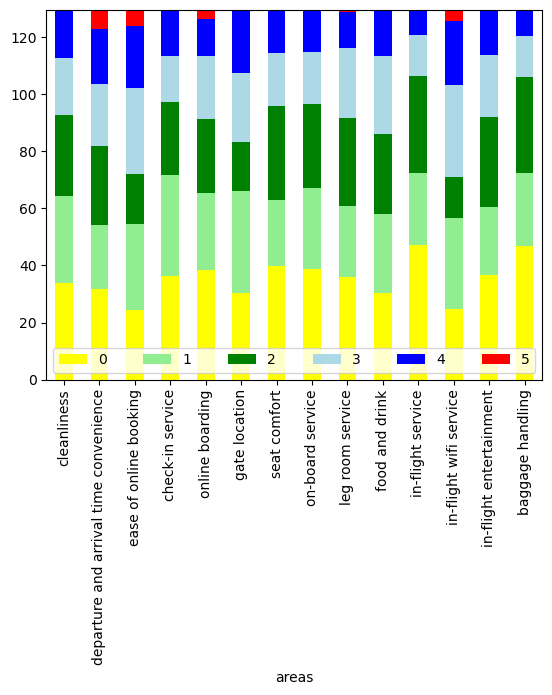

In [161]:
plt.figure(figsize=(15,5))
trans.set_index('areas').plot(kind='bar', stacked=True, color=['yellow','lightgreen','green','lightblue','blue','red'])
plt.legend(loc='lower left', mode='expand', ncol=6);

# What is the customer profile for a repeating airline passenger?

In [162]:
airpass_df['customer type'].unique()

array(['First-time', 'Returning'], dtype=object)

In [163]:
ret_cust = airpass_df[(airpass_df['customer type'] == 'Returning')]
ret_cust.head()

,id,gender,age,customer type,type of travel,class,flight distance,departure delay,arrival delay,departure and arrival time convenience,...,on-board service,seat comfort,leg room service,cleanliness,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling,satisfaction
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied


In [164]:
ret_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105773 entries, 1 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      105773 non-null  int64  
 1   gender                                  105773 non-null  object 
 2   age                                     105773 non-null  int64  
 3   customer type                           105773 non-null  object 
 4   type of travel                          105773 non-null  object 
 5   class                                   105773 non-null  object 
 6   flight distance                         105773 non-null  int64  
 7   departure delay                         105773 non-null  int64  
 8   arrival delay                           105773 non-null  float64
 9   departure and arrival time convenience  105773 non-null  int64  
 10  ease of online booking                  1057

In [165]:
round(ret_cust['gender'].value_counts('normalize')*100,2)

Female    50.01
Male      49.99
Name: gender, dtype: float64

### Female returning passengers are a little bit more than males. The difference is however quite little. 

In [166]:
ret_cust['age'].describe()

count    105773.000000
mean         41.463625
std          15.135105
min           7.000000
25%          31.000000
50%          43.000000
75%          53.000000
max          85.000000
Name: age, dtype: float64

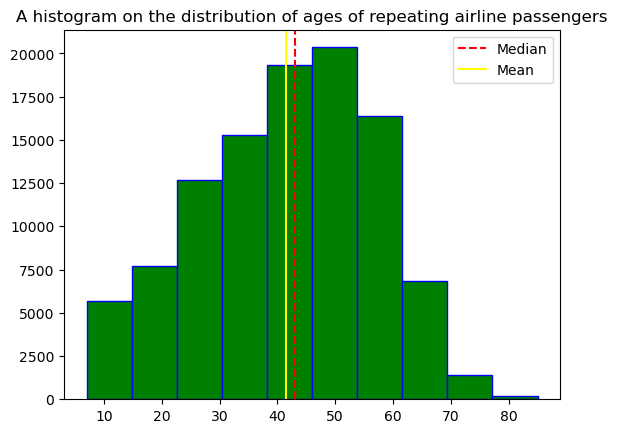

In [167]:
plt.hist(ret_cust.age, bins=10, color = 'green', edgecolor = 'blue')
plt.title('A histogram on the distribution of ages of repeating airline passengers')
plt.axvline(ret_cust['age'].median(), color='red', linestyle='dashed', label='Median')
plt.axvline(ret_cust['age'].mean(), color='yellow', label='Mean')
plt.legend();

In [168]:
## Median adopted as average since std is quite high
ret_cust[ret_cust['age'] < 43].count()[0]

52532

In [169]:
ret_cust[ret_cust['age'] > 43].count()[0]

50563

### The statistics show that repeating customers are mainly between 40 and 50 years with the average age identified as 43years. The majority of the customers are however above 43years

In [170]:
ret_cust['type of travel'].value_counts('normalize')*100

Business    62.331597
Personal    37.668403
Name: type of travel, dtype: float64

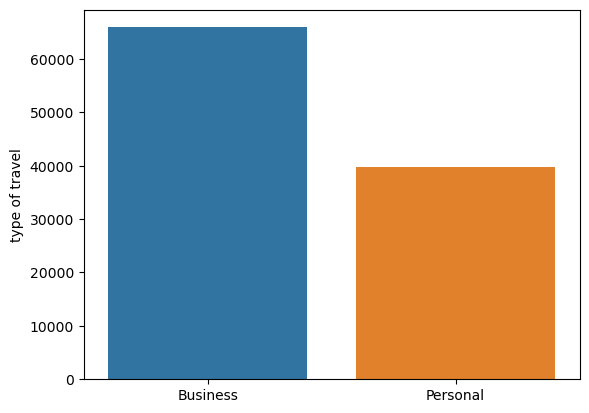

In [171]:
sns.barplot(ret_cust,x=ret_cust['type of travel'].unique(),y=ret_cust['type of travel'].value_counts());

### The majority of the returning passengers travel for the purposes of business

In [172]:
ret_cust['class'].value_counts('normalize')*100

Business        49.899313
Economy         42.094864
Economy Plus     8.005824
Name: class, dtype: float64

### For returning customers, the larger proportion opt for business class as compared to economy and economy plus.
- This finding also supports returning customers having a higher level of satisfaction with the airline as compared to new passengers. 

In [173]:
trav_class = ret_cust.groupby('type of travel')['class'].value_counts('normalize').unstack()*100
trav_class

class,Business,Economy,Economy Plus
type of travel,,,
Business,76.032155,17.929622,6.038222
Personal,6.656125,82.082173,11.261702


### The passengers who travel for business largely use business class whiles those who travel for personal reasons tend to use economy

In [174]:
ret_cust['flight distance'].describe()

count    105773.00000
mean       1297.02252
std        1048.84933
min          31.00000
25%         440.00000
50%         925.00000
75%        1986.00000
max        4983.00000
Name: flight distance, dtype: float64

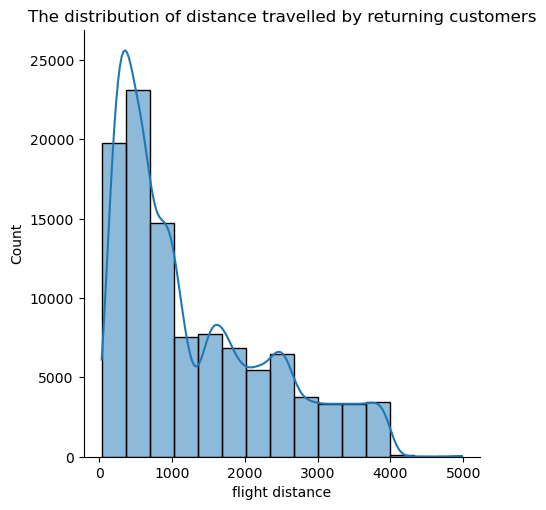

In [175]:
sns.displot(ret_cust, x=ret_cust['flight distance'], kde=True, bins=15)
plt.title('The distribution of distance travelled by returning customers');

### More than 75% of the returning customers traveled to destinations less that 2000 miles. The furthest distance traveled however by a returning customer was close to 5000 miles whiles the shortest was 31 miles. Averagely, returning customers travel for about 925 miles.  

### Recategorizing flight distance to determine long, medium, and short distance
- Long-haul flight > 3000 miles
- Medium-haul flight > 1000 miles
- Short-haul flight < 1000 miles

In [176]:
ret_cust['dist'] = ret_cust['flight distance'].apply(lambda x: 1 if x < 1000 else 2 if x < 3000 else 3)

C:\Users\Samuel Oduro Ofori\AppData\Local\Temp\ipykernel_6004\3267901480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_cust['dist'] = ret_cust['flight distance'].apply(lambda x: 1 if x < 1000 else 2 if x < 3000 else 3)


In [177]:
dis_map = {
    1:'Short-haul flight',
    2:'Medium-haul flight',
    3:'Long-haul flight'    
}

In [178]:
ret_cust['dist'] = ret_cust['dist'].map(dis_map)
ret_cust.head()

C:\Users\Samuel Oduro Ofori\AppData\Local\Temp\ipykernel_6004\1460349712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_cust['dist'] = ret_cust['dist'].map(dis_map)


,id,gender,age,customer type,type of travel,class,flight distance,departure delay,arrival delay,departure and arrival time convenience,...,seat comfort,leg room service,cleanliness,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling,satisfaction,dist
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,Short-haul flight
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,Short-haul flight
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,Medium-haul flight
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,Long-haul flight
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,3,3,4,4,4,4,Satisfied,Long-haul flight


In [179]:
ret_cust.rename(columns={'dist':'dist_cat'}, inplace=True)

C:\Users\Samuel Oduro Ofori\AppData\Local\Temp\ipykernel_6004\3679298984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_cust.rename(columns={'dist':'dist_cat'}, inplace=True)


In [180]:
ret_cust['dist_cat'].value_counts('normalize')*100

Short-haul flight     53.532565
Medium-haul flight    36.748509
Long-haul flight       9.718926
Name: dist_cat, dtype: float64

### Returning customers tend to opt for short-haul flights, followed by medium and then long-haul

In [181]:
ret_cust.groupby(['type of travel','class'])['dist_cat'].value_counts('normalize').unstack()*100

dist_cat                     Long-haul flight  Medium-haul flight  \
type of travel class                                                
Business       Business             20.357884           50.071816   
               Economy               0.109974           20.903477   
               Economy Plus          0.150716           21.150465   
Personal       Business              0.226244           28.355958   
               Economy               0.137598           26.100783   
               Economy Plus          0.111433           26.053042   

dist_cat                     Short-haul flight  
type of travel class                            
Business       Business              29.570300  
               Economy               78.986549  
               Economy Plus          78.698819  
Personal       Business              71.417798  
               Economy               73.761619  
               Economy Plus          73.835525

In [182]:
ret_cust.groupby(['type of travel','class'])['dist_cat'].value_counts('normalize').unstack()*100

dist_cat                     Long-haul flight  Medium-haul flight  \
type of travel class                                                
Business       Business             20.357884           50.071816   
               Economy               0.109974           20.903477   
               Economy Plus          0.150716           21.150465   
Personal       Business              0.226244           28.355958   
               Economy               0.137598           26.100783   
               Economy Plus          0.111433           26.053042   

dist_cat                     Short-haul flight  
type of travel class                            
Business       Business              29.570300  
               Economy               78.986549  
               Economy Plus          78.698819  
Personal       Business              71.417798  
               Economy               73.761619  
               Economy Plus          73.835525

### About half of the returning paasengers who travel for the purpose of business and in business class tend to travel to destinations lower than 3000 miles but higher than a 1000 miles (medium haul).
- For those in economy and economy plus, the larger proportion who travel for business take shorter flights
- Longer distance flights are mainly patronized by returning customers traveling for business reasons and in business class

### For returning customers who travel for personal reasons, the majority of them travel shorter miles and a few for medium hauls. 
- Those who travel longer distances are much smaller 

## The satisfaction of returning customers

In [183]:
(ret_cust['satisfaction'] == 'Satisfied').sum()/ret_cust['satisfaction'].count()*100

47.81371427490947

### Approximately 48% of returning customers are satisfied with the airline

# Does flight distance affect customer preferences or flight patterns?

In [184]:
airpass_df2= airpass_df.copy()
airpass_df2.head()

,id,gender,age,customer type,type of travel,class,flight distance,departure delay,arrival delay,departure and arrival time convenience,...,on-board service,seat comfort,leg room service,cleanliness,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling,satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [185]:
airpass_df2['trav_dist'] = airpass_df2['flight distance'].apply(lambda x: 1 if x < 1000 else 2 if x < 3000 else 2)

In [186]:
dis_map1 = {
    1:'Short-haul flight',
    2:'Medium-haul flight',
    3:'Long-haul flight'    
}

In [187]:
airpass_df2['trav_dist'] = airpass_df2['trav_dist'].map(dis_map1)
airpass_df2.head()

,id,gender,age,customer type,type of travel,class,flight distance,departure delay,arrival delay,departure and arrival time convenience,...,seat comfort,leg room service,cleanliness,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling,satisfaction,trav_dist
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,Short-haul flight
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,Short-haul flight
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,Short-haul flight
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,Medium-haul flight
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,Medium-haul flight


In [188]:
airpass_df2.groupby('trav_dist')['class'].value_counts('normalize').unstack()*100

class,Business,Economy,Economy Plus
trav_dist,,,
Medium-haul flight,70.613658,25.357555,4.028788
Short-haul flight,31.290064,59.121261,9.588675


In [189]:
airpass_df2.groupby('trav_dist')['customer type'].value_counts('normalize').unstack()*100

customer type,First-time,Returning
trav_dist,,
Medium-haul flight,9.993224,90.006776
Short-haul flight,24.381677,75.618323


In [190]:
airpass_df2.groupby('trav_dist')['type of travel'].value_counts('normalize').unstack()*100

type of travel,Business,Personal
trav_dist,,
Medium-haul flight,80.638013,19.361987
Short-haul flight,60.645032,39.354968


In [191]:
tdist_sat = airpass_df2.groupby('trav_dist')['satisfaction'].value_counts('normalize').unstack()*100

In [192]:
tdist_sat = pd.DataFrame(tdist_sat).reset_index()
tdist_sat

satisfaction,trav_dist,Neutral or Dissatisfied,Satisfied
0,Medium-haul flight,42.309594,57.690406
1,Short-haul flight,66.935096,33.064904


In [193]:
#tdist_sat.drop('index', axis=1, inplace=True)

In [194]:
tdist_sat

satisfaction,trav_dist,Neutral or Dissatisfied,Satisfied
0,Medium-haul flight,42.309594,57.690406
1,Short-haul flight,66.935096,33.064904


<Axes: xlabel='trav_dist'>

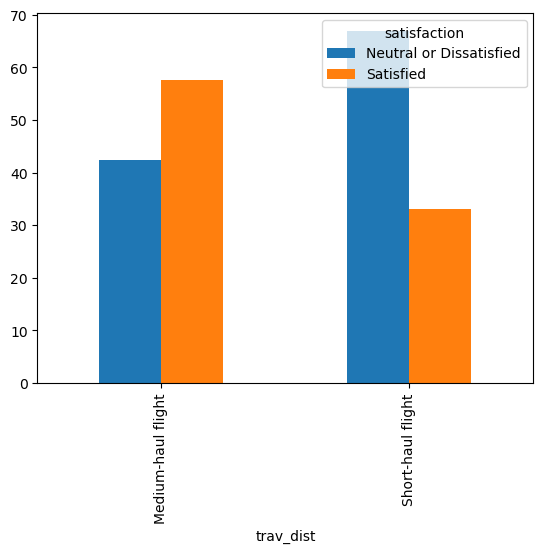

In [195]:
tdist_sat.set_index('trav_dist').plot(kind='bar')

In [196]:
airpass_df2.groupby(['trav_dist','class'])['satisfaction'].value_counts('normalize').unstack()*100

satisfaction                     Neutral or Dissatisfied  Satisfied
trav_dist          class                                           
Medium-haul flight Business                    25.417531  74.582469
                   Economy                     83.512674  16.487326
                   Economy Plus                79.045455  20.954545
Short-haul flight  Business                    39.005548  60.994452
                   Economy                     80.530834  19.469166
                   Economy Plus                74.247911  25.752089

In [197]:
airpass_df2.groupby(['trav_dist','class','type of travel'])['satisfaction'].value_counts('normalize').unstack()*100

satisfaction                                    Neutral or Dissatisfied  \
trav_dist          class        type of travel                            
Medium-haul flight Business     Business                      24.152711   
                                Personal                      88.073394   
                   Economy      Business                      73.248897   
                                Personal                      89.705882   
                   Economy Plus Business                      66.569201   
                                Personal                      89.948893   
Short-haul flight  Business     Business                      34.647900   
                                Personal                      88.328076   
                   Economy      Business                      69.245754   
                                Personal                      89.847423   
                   Economy Plus Business                      59.202692   
                                Personal                      91.769671   

satisfaction                                    Satisfied  
trav_dist          class        type of travel             
Medium-haul flight Business     Business        75.847289  
                                Personal        11.926606  
                   Economy      Business        26.751103  
                                Personal        10.294118  
                   Economy Plus Business        33.430799  
                                Personal        10.051107  
Short-haul flight  Business     Business        65.352100  
                                Personal        11.671924  
                   Economy      Business        30.754246  
                                Personal        10.152577  
                   Economy Plus Business        40.797308  
                                Personal         8.230329

# Which factors contribute to customer satisfaction the most? 
- What about dissatisfaction?

In [201]:
airpass_df['satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [202]:
sat_mod = {
    'Neutral or Dissatisfied': 0,
    'Satisfied':1
}

In [205]:
airpass_df['sat_cat'] = airpass_df['satisfaction'].map(sat_mod)

In [207]:
airpass_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      129487 non-null  int64  
 1   gender                                  129487 non-null  object 
 2   age                                     129487 non-null  int64  
 3   customer type                           129487 non-null  object 
 4   type of travel                          129487 non-null  object 
 5   class                                   129487 non-null  object 
 6   flight distance                         129487 non-null  int64  
 7   departure delay                         129487 non-null  int64  
 8   arrival delay                           129487 non-null  float64
 9   departure and arrival time convenience  129487 non-null  int64  
 10  ease of online booking                  1294

In [208]:
airpass_df.corr()

C:\Users\Samuel Oduro Ofori\AppData\Local\Temp\ipykernel_6004\2556262247.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  airpass_df.corr()


,id,age,flight distance,departure delay,arrival delay,departure and arrival time convenience,ease of online booking,check-in service,online boarding,gate location,on-board service,seat comfort,leg room service,cleanliness,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling,sat_cat
id,1.000000,0.020443,0.095027,-0.017506,-0.035657,-0.002056,0.013247,0.079154,0.055428,-0.000019,0.055454,0.052352,0.043914,0.024425,-0.000183,0.078838,-0.023242,0.001944,0.074618,0.012990
age,0.020443,1.000000,0.099863,-0.009263,-0.011248,0.036780,0.022294,0.033182,0.207485,-0.000709,0.056743,0.159229,0.038992,0.052575,0.023283,-0.051778,0.015779,0.074990,-0.048192,0.134001
flight distance,0.095027,0.099863,1.000000,0.001992,-0.001935,-0.018901,0.064959,0.073635,0.215082,0.005378,0.111224,0.157825,0.134548,0.095658,0.057136,0.059182,0.006554,0.130518,0.064810,0.298206
departure delay,-0.017506,-0.009263,0.001992,1.000000,0.965291,0.000610,-0.005330,-0.018632,-0.019319,0.005943,-0.030471,-0.027711,0.014339,-0.014553,-0.029351,-0.054329,-0.016046,-0.027166,-0.004425,-0.051032
arrival delay,-0.035657,-0.011248,-0.001935,0.965291,1.000000,-0.000942,-0.007033,-0.021705,-0.022730,0.005658,-0.034789,-0.030521,0.011346,-0.016546,-0.031715,-0.059853,-0.017749,-0.030230,-0.007935,-0.058275
departure and arrival time convenience,-0.002056,0.036780,-0.018901,0.000610,-0.000942,1.000000,0.437697,0.091217,0.072175,0.447411,0.067046,0.008707,0.010634,0.010021,0.001057,0.072166,0.344846,-0.008189,0.070646,-0.054457
ease of online booking,0.013247,0.022294,0.064959,-0.005330,-0.007033,0.437697,1.000000,0.008835,0.404944,0.460155,0.039039,0.028602,0.109341,0.015150,0.030638,0.035356,0.714888,0.046669,0.039215,0.168704
check-in service,0.079154,0.033182,0.073635,-0.018632,-0.021705,0.091217,0.008835,1.000000,0.204215,-0.039294,0.244620,0.189838,0.152715,0.176611,0.085103,0.237737,0.043847,0.119664,0.234732,0.237146
online boarding,0.055428,0.207485,0.215082,-0.019319,-0.022730,0.072175,0.404944,0.204215,1.000000,0.002579,0.154272,0.419169,0.123149,0.329331,0.233524,0.073973,0.457422,0.284008,0.083563,0.501620
gate location,-0.000019,-0.000709,0.005378,0.005943,0.005658,0.447411,0.460155,-0.039294,0.002579,1.000000,-0.029109,0.002493,-0.005146,-0.006066,-0.002825,0.000337,0.338547,0.002751,0.001097,-0.002923


C:\Users\Samuel Oduro Ofori\AppData\Local\Temp\ipykernel_6004\298343405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(airpass_df.corr(),cmap='PRGn')


<Axes: >

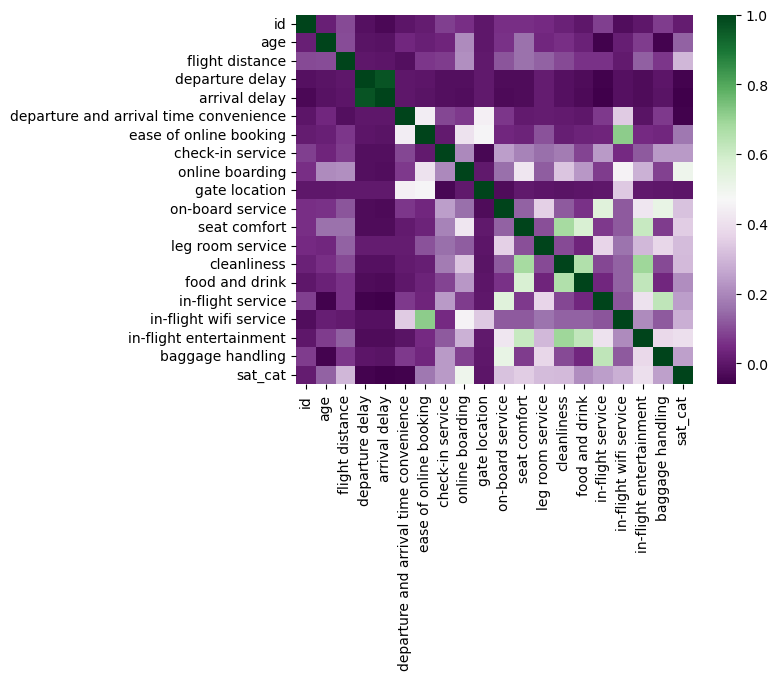

In [209]:
sns.heatmap(airpass_df.corr(),cmap='PRGn')